# Google Colab 한글 폰트 설치

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

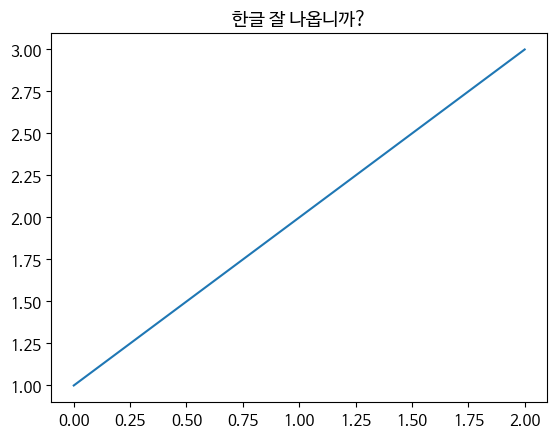

In [3]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# z-검정, t-검정
- 평균 차이 검정
- z검정
  + 모수의 분산, 표준편차 등을 알고 있어야 함

In [5]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


- 모수의 표준편차는 9.5로 알고 있음

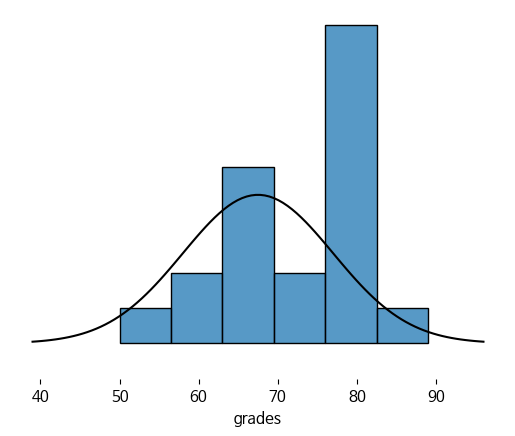

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5       # 모수의 평균
sigma = 9.5     # 모수의 편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

## 가설수립
- 귀무가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!
- 대립가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다.

## z-score 구하기

In [7]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

2.259605535157681

## p-value

In [8]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

# t-검정의 종류
- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test (두 평균의 비교, 독립검정)

## One-Sample t-test
- 일표본 단일검정
- z-검정과의 차이점
  + 모집단의 표준편차를 모름
  + 모집단의 평균을 알고 있음
  + 자유도 : N-1 (z-검정은 N)
- 모집단의 평균 : 사회적인 통념, 알려진 사실
- 가설설정
  + 귀무가설 : 모집단의 평균과 표본의 평균은 같다.
    - 오리온 초코칩의 무게중량 45g이 맞을 것이야
  + 대립가설 : 모집단의 평균과 표본의 평균은 다르다.
    - 오리온 초코칩의 무게중량 45g이 아니다!


In [9]:
N = len(df['grades'])
degfree = N-1
sample_mean = df['grades'].mean()
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


In [13]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a = df['grades'], popmean = 71)
t, p

(0.6106514014810425, 0.5486662606700853)

- 신뢰구간 추정

In [12]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(67.84421513791415, 76.75578486208585)

In [14]:
ttest_1samp(a = df['grades'], popmean = 71).confidence_interval()

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

## t-검정 (independent t-test)
- 가정 만족 확인 : 정규성과 등분산성 검정
- 정규성의 가설 검정
  + 귀무가설 : 데이터가 정규분포를 만족한다.
  + 대립가설 : 데이터가 정규분포를 이루고 있지 않다.
- 등분산성 가설 검정
  + 귀무가설 : 두 그룹의 분산이 같다.
  + 대립가설 : 두 그룹의 분산이 다르다.
- t-검정 가설검정

In [15]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 시각화
- 독립성 검정을 시행할 수 있는 변수는 총 3개인 것 확인 가능
- 시나리오
  + 성별에 따라서 팁의 액수 평균차이가 존재할까?
  + 흡연여부에 따라서 팁의 액수 평균차이가 존재할까?
  + 시간대에 따라서 팁의 액수 평균차이가 존재할까?

In [20]:
tips['size'].value_counts()

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


- 히스토그램
  + 데이터가 연속형일때, 숫자일 때 그래프 그려야 함
  + tip을 그립니다.

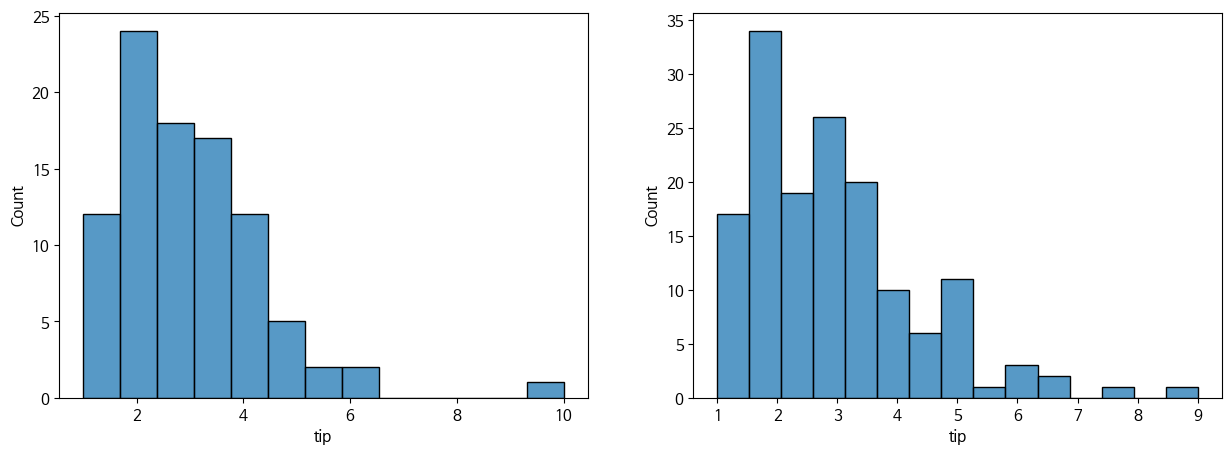

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
smoker_yes = tips.loc[tips['smoker'] == 'Yes', :]
smoker_no = tips.loc[tips['smoker'] == 'No', :]

# 시각화
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
sns.histplot(smoker_yes['tip'], ax = ax[0])
sns.histplot(smoker_no['tip'], ax = ax[1])
plt.show()

### 정규분포를 이루는 데이터

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


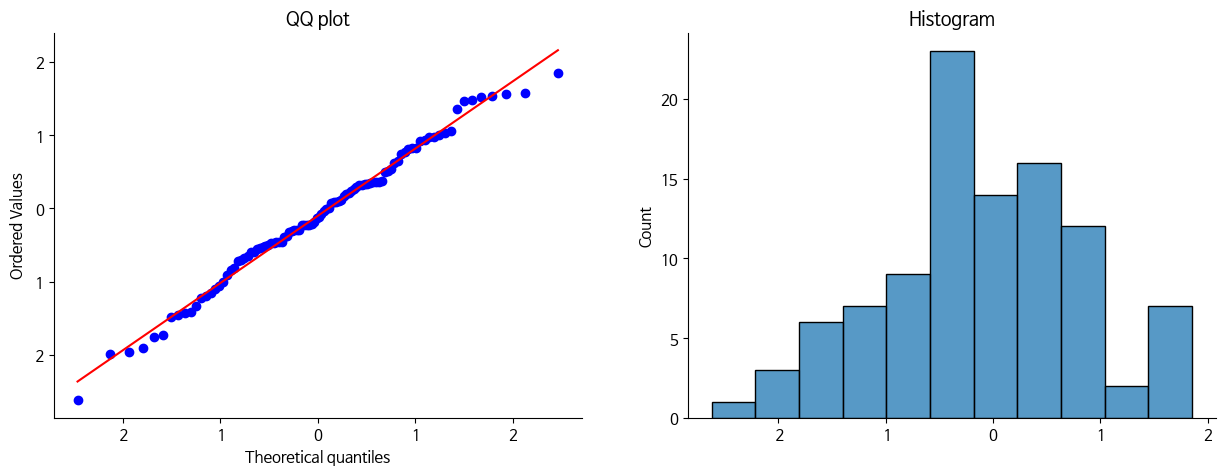

ShapiroResult(statistic=0.9898833815158516, pvalue=0.6551676754214818)

In [27]:
# 정규분포를 이루는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 샤피로 윌크 검정
- 데이터가 30개 미만이라는 가정 하에 정규성 검정 시행
  + 할 필요는 없음
- 가설검정
  + 귀무가설 : 데이터는 정규분포다
  + 대립가설 : 데이터는 정규분포가 아니다

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


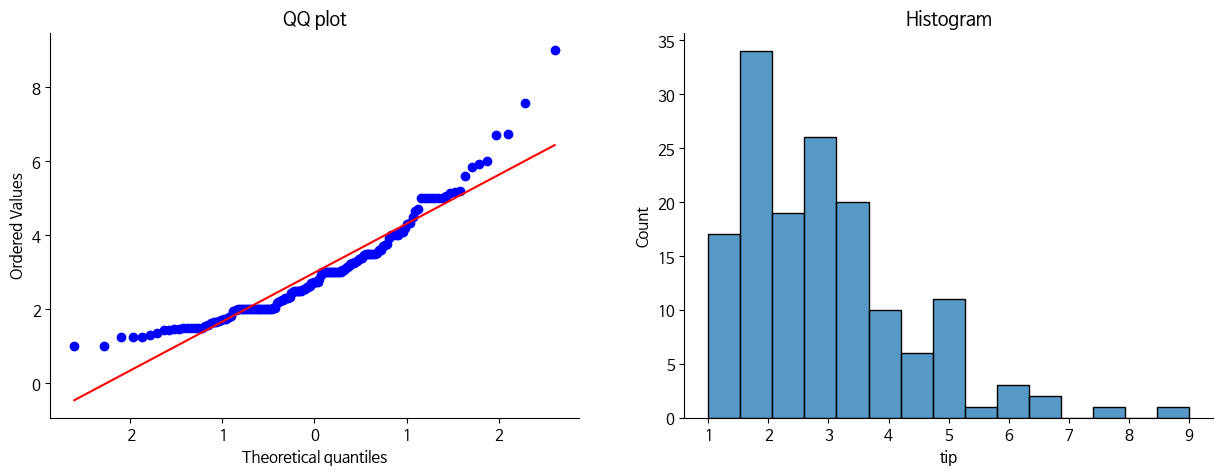

ShapiroResult(statistic=0.9040014583128897, pvalue=2.0587577392218136e-08)

In [29]:
# 정규분포를 이루지 못하는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
smoker_yes = tips.loc[tips['smoker'] == 'No', :]
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 등분산성 검정

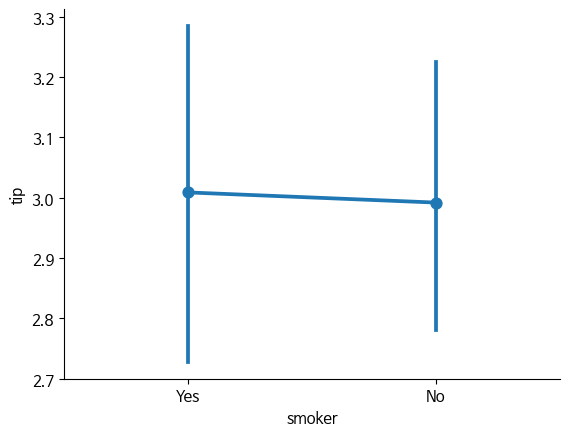

In [30]:
fig, ax = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()

In [32]:
from scipy import stats

# tips
# smoker_yes, smoker_no

t, p = stats.levene(smoker_yes['tip'], smoker_no['tip'])
t, p # 0.88

(0.0, 1.0)

- 두 그룹의 분산은 같다.

### 가설검정
- 귀무가설 : 두 그룹의 평균은 같다
- 대립가설 : 두 그룹의 평균은 다르다

In [33]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)

# Output the results
print(f"T-statistic: {t_stat}") # 0.09
print(f"P-value: {p_val}") # 0.9265

T-statistic: 0.0
P-value: 1.0


### 박스플롯 시각화
- 두그룹의 박스플롯 시각화 결과 확인